## Certification Project Question File

Import required libraries

In [2]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

Load given datasets

In [59]:
df_train = pd.read_csv(r"C:\Users\kohil\Downloads\Edureka_Consumer_Complaints_train.csv")
df_test = pd.read_csv(r"C:\Users\kohil\Downloads\Edureka_Consumer_Complaints_test.csv")
df_train1 = pd.read_csv(r"C:\Users\kohil\Downloads\Edureka_Consumer_Complaints_train.csv")

Print top 5 records of train dataset

In [4]:
print(df_train.head())


  Date received                  Product  \
0    2015-10-14         Credit reporting   
1    2015-04-26  Bank account or service   
2    2013-12-20              Credit card   
3    2016-03-03          Debt collection   
4    2015-01-30          Debt collection   

                             Sub-product  \
0                                    NaN   
1             Other bank product/service   
2                                    NaN   
3  Other (i.e. phone, health club, etc.)   
4                                Medical   

                                    Issue  \
0  Incorrect information on credit report   
1                Deposits and withdrawals   
2                                   Other   
3         Disclosure verification of debt   
4         Disclosure verification of debt   

                              Sub-issue  \
0               Information is not mine   
1                                   NaN   
2                                   NaN   
3  Not given enough info to

Print top 5 records of test dataset

In [5]:
print(df_test.head())

  Date received          Product                            Sub-product  \
0    2015-01-17      Credit card                                    NaN   
1    2016-06-22    Consumer Loan                             Title loan   
2    2015-09-04      Credit card                                    NaN   
3    2016-05-17    Consumer Loan                       Installment loan   
4    2016-07-07  Debt collection  Other (i.e. phone, health club, etc.)   

                                   Issue  \
0  Customer service / Customer relations   
1           Payment to acct not credited   
2          Credit line increase/decrease   
3    Problems when you are unable to pay   
4    Improper contact or sharing of info   

                               Sub-issue  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4  Contacted employer after asked not to   

                   

**Note: Please note that do all given tasks for test and train both datasets.**

Print shape of train and test datasets 

In [6]:
print(df_train.shape, df_test.shape)

(358810, 18) (119606, 17)


Print columns of train and test datasets

In [7]:
print("Train data columns : \n", df_train.columns)
print("Test data columns : \n", df_test.columns)

Train data columns : 
 Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')
Test data columns : 
 Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')


Check data type for both datasets

In [8]:
print("Data types\n")
print(df_train.dtypes, df_test.dtypes)

Data types

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object

Print missing values in percentage

In [9]:
def print_missing_percentage(df, dataset_name):
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    print(f"Missing values percentage in {dataset_name} dataset:")
    print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))
    return(missing_percentage)

# Print missing values percentage for the training dataset
train_missing = print_missing_percentage(df_train, "Training")

# Print missing values percentage for the test dataset
test_missing = print_missing_percentage(df_test, "Test")


Missing values percentage in Training dataset:
Tags                            86.002062
Consumer complaint narrative    84.342688
Company public response         81.067696
Consumer consent provided?      71.689752
Sub-issue                       61.139322
Sub-product                     28.925058
ZIP code                         0.811293
State                            0.809063
dtype: float64
Missing values percentage in Test dataset:
Tags                            85.805896
Consumer complaint narrative    84.186412
Company public response         81.221678
Consumer consent provided?      71.651088
Sub-issue                       61.242747
Sub-product                     28.997709
ZIP code                         0.783406
State                            0.782569
dtype: float64


Drop columns where more than 25% of the data are missing.

In [10]:
threshold = 25.0
columns_to_drop_train = train_missing[train_missing > threshold].index
columns_to_drop_test = test_missing[test_missing > threshold].index

df_train.drop(columns=columns_to_drop_train, inplace=True)
df_test.drop(columns=columns_to_drop_test, inplace=True)

print(df_train.columns, df_test.columns)

Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object') Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')


Extract Date, Month, and Year from the "Date Received" Column and create new fields for year, month, and day.

like, df_train['Year_Received'] = df_train['Date received']........(logic)

In [11]:
df_train['Date received'] = pd.to_datetime(df_train['Date received'])

# Create new fields for year, month, and day
df_train['Year_received'] = df_train['Date received'].dt.year
df_train['Month_received'] = df_train['Date received'].dt.month
df_train['Day_received'] = df_train['Date received'].dt.day

# Display the updated DataFrame
print(df_train.columns)

df_test['Date received'] = pd.to_datetime(df_test['Date received'])

# Create new fields for year, month, and day
df_test['Year_received'] = df_test['Date received'].dt.year
df_test['Month_received'] = df_test['Date received'].dt.month
df_test['Day_received'] = df_test['Date received'].dt.day

# Display the updated DataFrame
print(df_test.columns)

Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'Year_received', 'Month_received', 'Day_received'],
      dtype='object')
Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID', 'Year_received', 'Month_received',
       'Day_received'],
      dtype='object')


Convert dates from object type to datetime type

In [12]:
df_train['Date sent to company'] = pd.to_datetime(df_train['Date sent to company'])
df_test['Date sent to company'] = pd.to_datetime(df_test['Date sent to company'])

print(df_train.dtypes)
print(df_test.dtypes)

Date received                   datetime64[ns]
Product                                 object
Issue                                   object
Company                                 object
State                                   object
ZIP code                                object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
Complaint ID                             int64
Year_received                            int32
Month_received                           int32
Day_received                             int32
dtype: object
Date received                   datetime64[ns]
Product                                 object
Issue                                   object
Company                                 object
State                                   object
ZIP code                                object

Calculate the number of days the complaint was with the company

create new field with help given logic<br>
Like, Days held = Date sent to company - Date received

In [13]:
df_train['Days held'] = (df_train['Date sent to company'] - df_train['Date received']).dt.days
df_test['Days held'] = (df_test['Date sent to company'] - df_test['Date received']).dt.days

Convert "Days Held" to Int(above column)

In [14]:
df_train['Days held'] = df_train['Days held'].astype(int)
df_test['Days held'] = df_test['Days held'].astype(int)

# Display the modified datasets
print(df_train[['Date received', 'Date sent to company', 'Days held']].head())
print(df_test[['Date received', 'Date sent to company', 'Days held']].head())

  Date received Date sent to company  Days held
0    2015-10-14           2015-10-14          0
1    2015-04-26           2015-04-26          0
2    2013-12-20           2014-01-03         14
3    2016-03-03           2016-03-04          1
4    2015-01-30           2015-01-30          0
  Date received Date sent to company  Days held
0    2015-01-17           2015-01-17          0
1    2016-06-22           2016-06-22          0
2    2015-09-04           2015-09-04          0
3    2016-05-17           2016-05-20          3
4    2016-07-07           2016-07-07          0


Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"

In [15]:
columns_to_drop = ['Date received', 'Date sent to company', 'ZIP code', 'Complaint ID']
date_train = df_train['Date received']  # will be using it later
date_test = df_test['Date received']    # will be using it later
df_train.drop(columns=columns_to_drop, inplace=True)
df_test.drop(columns=columns_to_drop, inplace=True)


print(df_train.columns)
print(df_test.columns)

Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Year_received', 'Month_received', 'Day_received',
       'Days held'],
      dtype='object')
Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?', 'Year_received',
       'Month_received', 'Day_received', 'Days held'],
      dtype='object')


Impute null values in "State" by Mode 
(find mode and replace nan value)

In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df_train[['State']] = imputer.fit_transform(df_train[['State']])
df_test[['State']] = imputer.transform(df_test[['State']])

Check Missing Values in the dataset

In [17]:
print("Train data - Missing values in 'State' column after imputation:", df_train['State'].isna().sum())
print("Test data - Missing values in 'State' column after imputation:", df_test['State'].isna().sum())

Train data - Missing values in 'State' column after imputation: 0
Test data - Missing values in 'State' column after imputation: 0


Categorize Days into Weeks with the help of 'Days Received'

In [18]:

df_train['Week'] = date_train.dt.strftime('%U').astype(int)
df_test['Week'] = date_test.dt.strftime('%U').astype(int)

print(df_train['Week'])
print(df_test['Week'])

0         41
1         17
2         50
3          9
4          4
          ..
358805    15
358806    10
358807     4
358808    25
358809    19
Name: Week, Length: 358810, dtype: int32
0          2
1         25
2         35
3         20
4         27
          ..
119601     6
119602    46
119603    20
119604    23
119605    11
Name: Week, Length: 119606, dtype: int32


Drop "Day_Received" column

In [19]:
# Already did

Print head of train and test dataset and observe

In [20]:
print(df_train.head())
print(df_test.head())
print(df_train.shape)
print(df_test.shape)

                   Product                                   Issue  \
0         Credit reporting  Incorrect information on credit report   
1  Bank account or service                Deposits and withdrawals   
2              Credit card                                   Other   
3          Debt collection         Disclosure verification of debt   
4          Debt collection         Disclosure verification of debt   

                                     Company State Submitted via  \
0                                    Equifax    GA           Web   
1                      Wells Fargo & Company    GA           Web   
2                                   Citibank    SC         Phone   
3       FAIR COLLECTIONS & OUTSOURCING, INC.    OH      Referral   
4  HCFS Health Care Financial Services, Inc.    CA           Web   

      Company response to consumer Timely response? Consumer disputed?  \
0          Closed with explanation              Yes                 No   
1          Closed with

Store data of the disputed consumer in the new data frame as "disputed_cons"

In [21]:
disputed_cons = df_train['Consumer disputed?']
disputed_cons = pd.DataFrame(disputed_cons)
print(type(disputed_cons))

<class 'pandas.core.frame.DataFrame'>


Plot bar graph for the total no of disputes with the help of seaborn

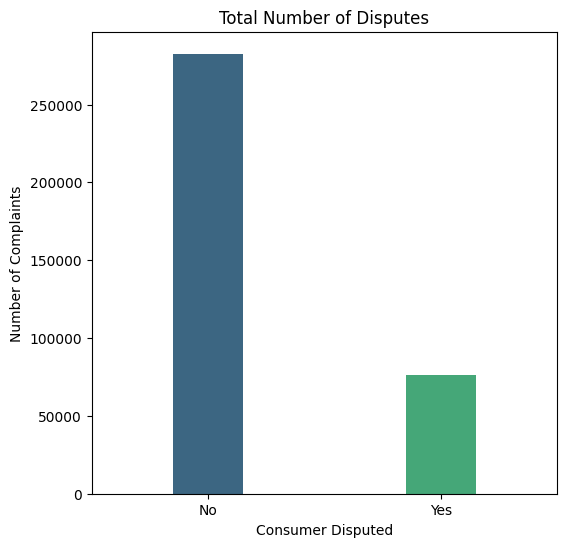

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.countplot(x=disputed_cons['Consumer disputed?'], palette="viridis", width=0.30)

plt.xlabel("Consumer Disputed")
plt.ylabel("Number of Complaints")
plt.title("Total Number of Disputes")

plt.show()

Plot bar graph for the total no of disputes products-wise with help of seaborn

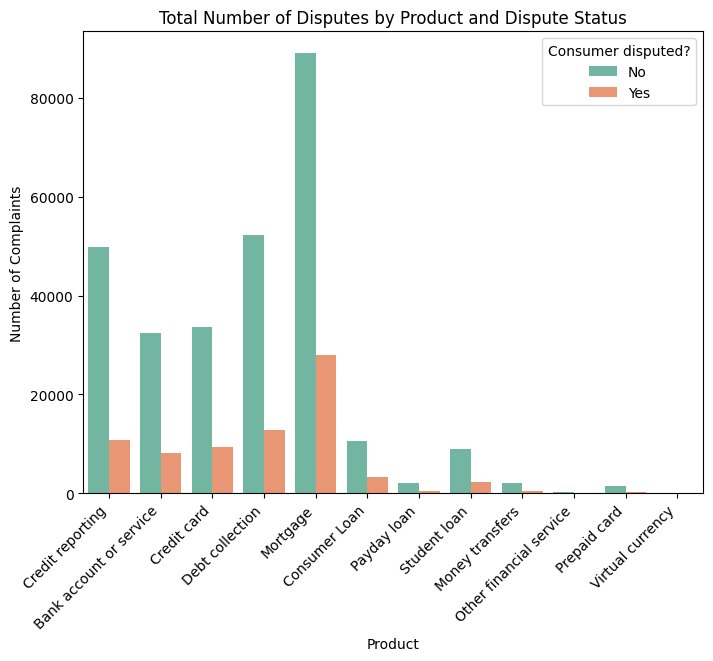

In [23]:
product_column = df_train['Product']

plt.figure(figsize=(8, 6))
sns.countplot(x=product_column, hue=disputed_cons['Consumer disputed?'], palette='Set2')

plt.xlabel('Product')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Number of Complaints')
plt.title('Total Number of Disputes by Product and Dispute Status')

plt.show()

Plot bar graph for the total no of disputes with Top Issues by Highest Disputes , with help of seaborn

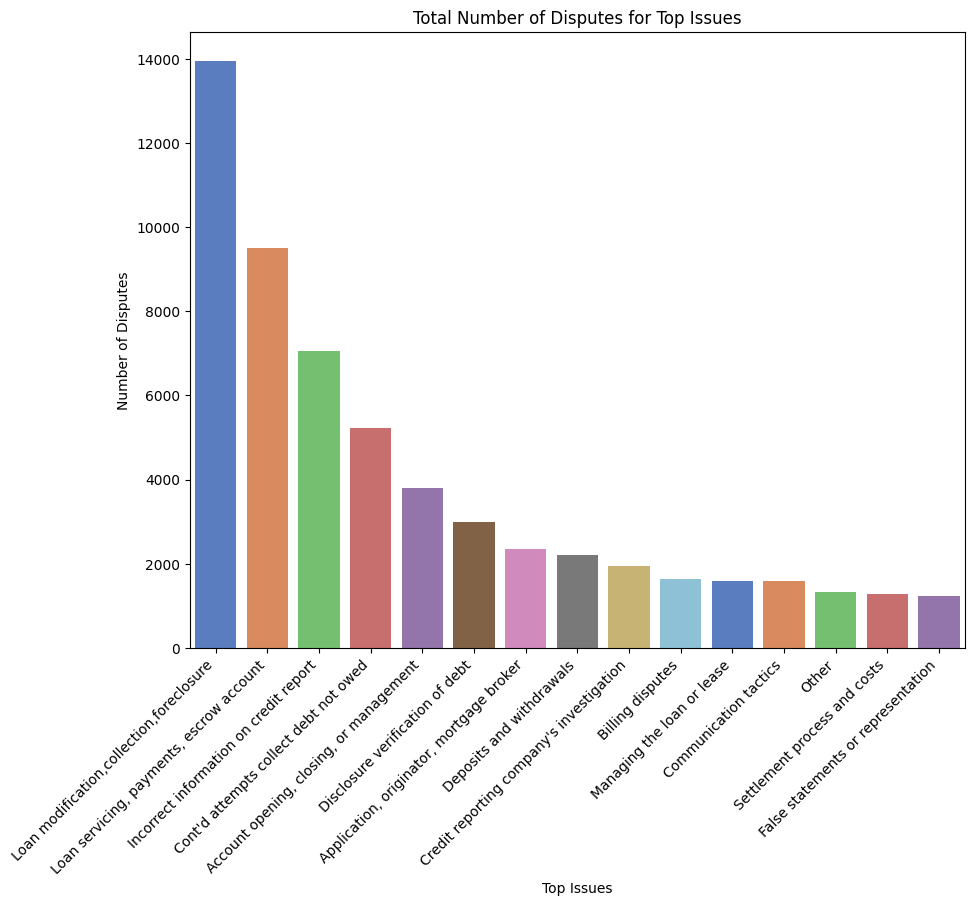

In [24]:
issue_dispute_counts = df_train[df_train['Consumer disputed?'] == 'Yes'].groupby('Issue')['Consumer disputed?'].count().sort_values(ascending=False)

top_issues = issue_dispute_counts.head(15) 

plt.figure(figsize=(10, 8))
sns.barplot(x=top_issues.index, y=top_issues.values, palette='muted')


plt.xlabel('Top Issues')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Number of Disputes')
plt.title('Total Number of Disputes for Top Issues')


plt.show()


Plot bar graph for the total no of disputes by State with Maximum Disputes

<class 'pandas.core.frame.DataFrame'>


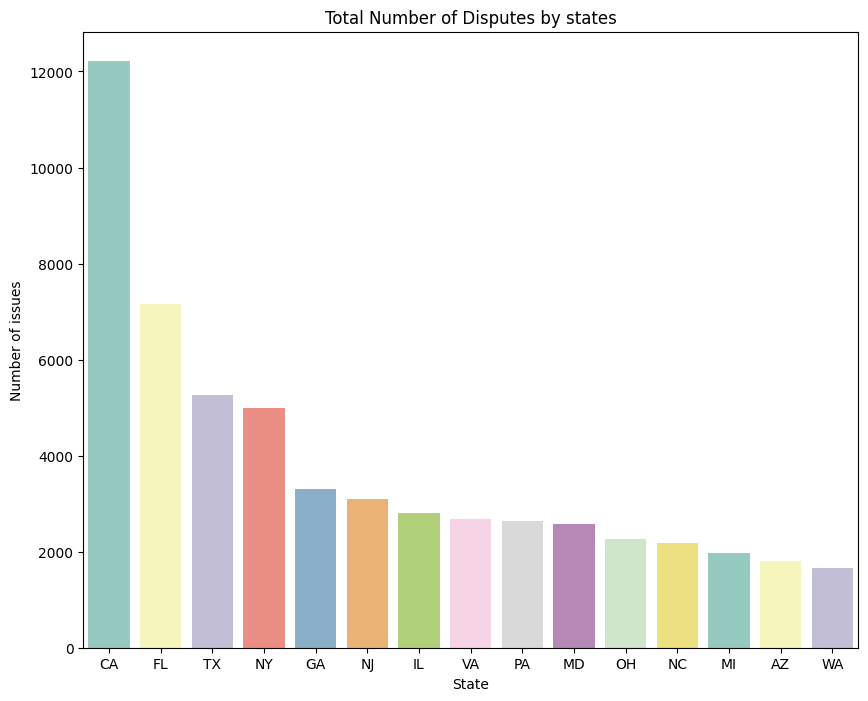

In [25]:
cons_disputed = df_train[df_train['Consumer disputed?'] == 'Yes']
print(type(cons_disputed))
issue_by_state = cons_disputed['State'].value_counts()
state_issue = issue_by_state.head(15)

plt.figure(figsize=(10, 8))
sns.barplot(x=state_issue.index, y=state_issue.values, palette='Set3')


plt.xlabel('State')
plt.ylabel('Number of issues')
plt.title('Total Number of Disputes by states')

plt.show()


Plot bar graph for the total no of disputes by Submitted Via diffrent source 

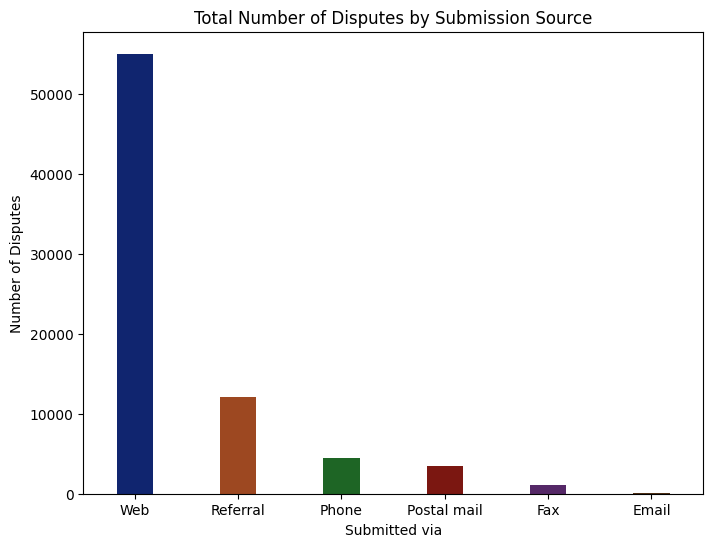

In [26]:
sub_via = cons_disputed['Submitted via'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sub_via.index, y=sub_via.values, palette='dark', width = 0.35)


plt.xlabel('Submitted via')
plt.ylabel('Number of Disputes')
plt.title('Total Number of Disputes by Submission Source')

plt.show()

Plot bar graph for the total no of disputes wherevCompany's Response to the Complaints

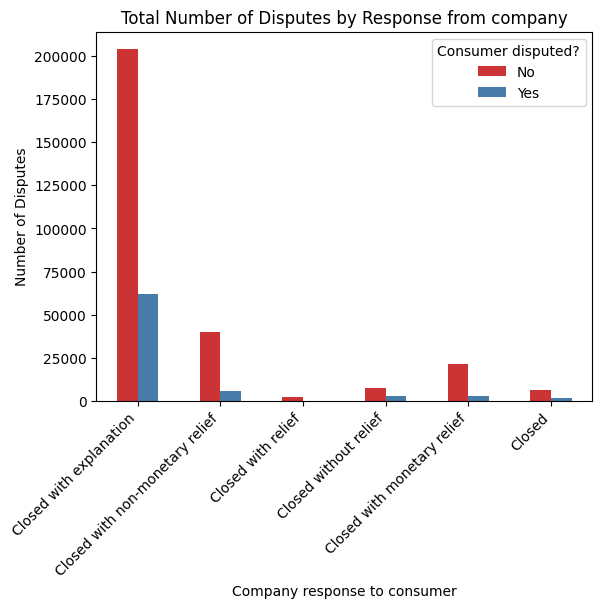

In [63]:
sns.countplot(x=df_train1['Company response to consumer'], hue = df_train1['Consumer disputed?'], palette = 'Set1', width = 0.5)

plt.xticks(rotation =45, ha = 'right')
plt.ylabel('Number of Disputes')
plt.title('Total Number of Disputes by Response from company')

plt.show()



Plot bar graph for the total no of disputes where Company's Response Leading to Disputes

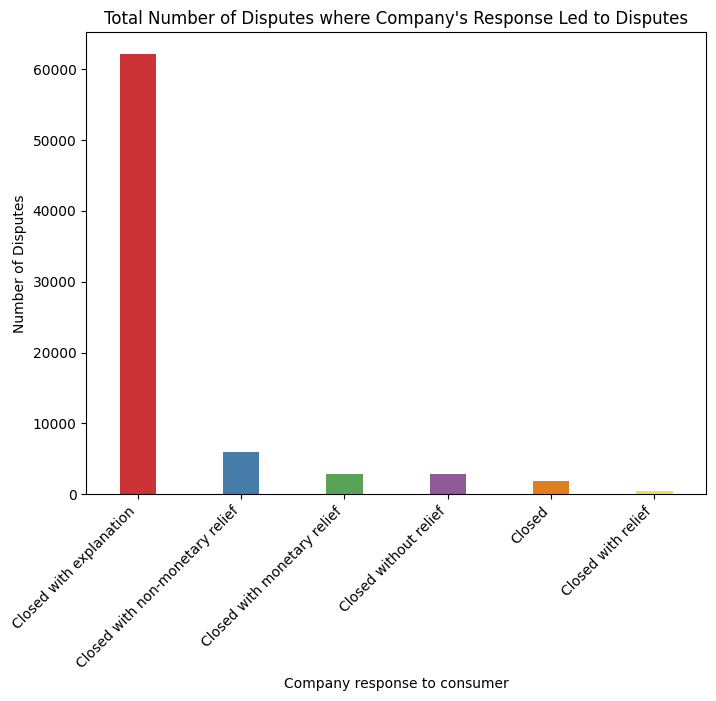

In [28]:
response_led_to_dispute_counts = cons_disputed['Company response to consumer'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=response_led_to_dispute_counts.index, y=response_led_to_dispute_counts.values, palette='Set1', width=0.35)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Disputes')
plt.title('Total Number of Disputes where Company\'s Response Led to Disputes')

plt.show()

Plot bar graph for the total no of disputes Whether there are Disputes Instead of Timely Response

Timely response?
Yes    74943
No      1229
Name: count, dtype: int64


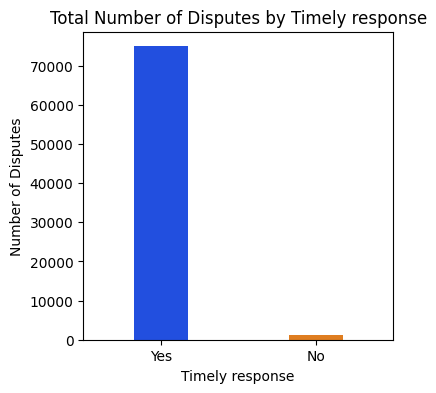

In [29]:
time_res = cons_disputed['Timely response?'].value_counts()
print(time_res)

plt.figure(figsize=(4, 4))
sns.barplot(x=time_res.index, y=time_res.values, palette='bright', width=0.35)

plt.xlabel("Timely response")
plt.ylabel('Number of Disputes')
plt.title('Total Number of Disputes by Timely response')

plt.show()

Plot bar graph for the total no of disputes over Year Wise Complaints

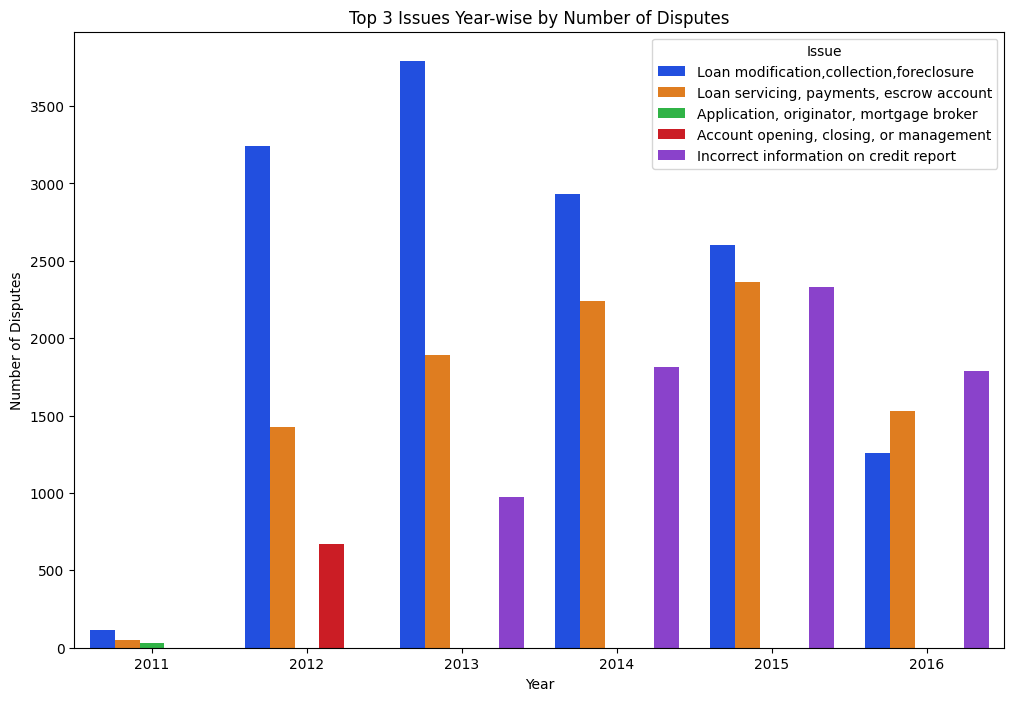

In [30]:
yearly_issue_counts = cons_disputed.groupby(['Year_received', 'Issue']).size().reset_index(name='Number of Disputes')

top_issues_by_year = yearly_issue_counts.groupby('Year_received').apply(lambda x: x.nlargest(3, 'Number of Disputes')).reset_index(drop=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='Year_received', y='Number of Disputes', hue='Issue', data=top_issues_by_year, palette='bright')
plt.xlabel('Year')
plt.ylabel('Number of Disputes')
plt.title('Top 3 Issues Year-wise by Number of Disputes')
plt.show()

Plot bar graph for the total no of disputes over Year Wise Disputes

Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Year_received', 'Month_received', 'Day_received',
       'Days held', 'Week'],
      dtype='object')


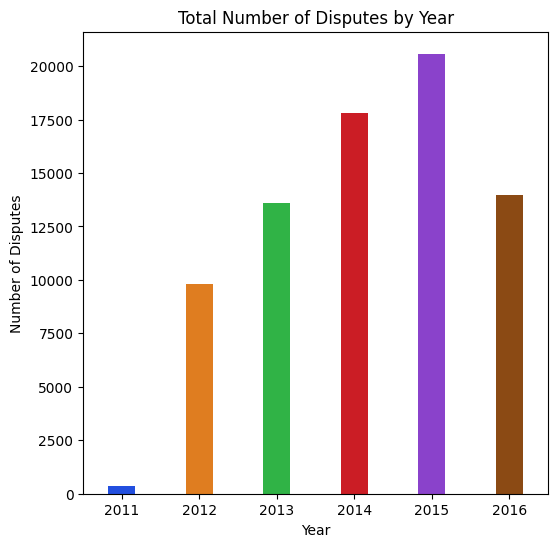

In [31]:
year_complaints = cons_disputed['Year_received'].value_counts()
print(cons_disputed.columns)
plt.figure(figsize=(6, 6))
sns.barplot(x=year_complaints.index, y=year_complaints.values, palette='bright', width=0.35)

plt.xlabel("Year")
plt.ylabel('Number of Disputes')
plt.title('Total Number of Disputes by Year')

plt.show()

Plot  bar graph for the top companies with highest complaints

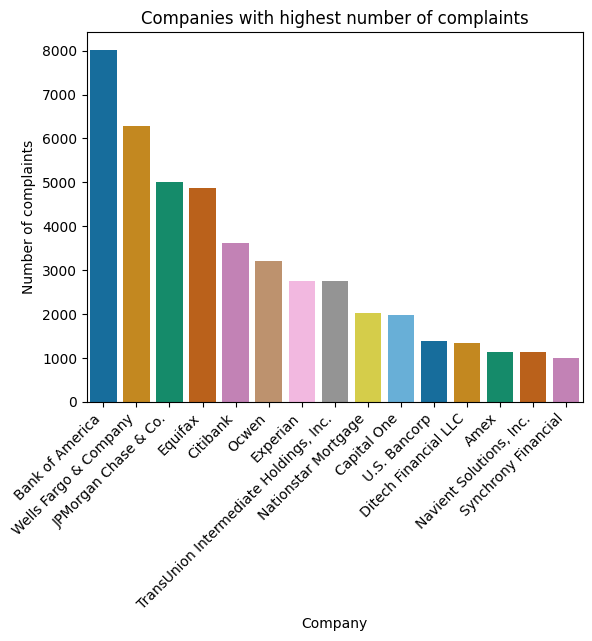

In [32]:
top_companies = cons_disputed.groupby('Company')['Issue'].count().sort_values(ascending=False)
top_companies = top_companies.head(15)

sns.barplot(x=top_companies.index, y=top_companies.values, palette='colorblind')

plt.xlabel("Company")
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel("Number of complaints")
plt.title("Companies with highest number of complaints")
plt.show()


"Days Held" Column Analysis(describe)

In [33]:
print(df_train['Days held'].describe())
print(df_test['Days held'].describe())


count    358810.000000
mean          4.456339
std          16.741676
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Days held, dtype: float64
count    119606.000000
mean          4.443607
std          16.233377
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         832.000000
Name: Days held, dtype: float64


Convert Negative Days Held to Zero(it is the time taken by authority can't be negative)

In [34]:
df_train['Days held'] = df_train['Days held'].apply(lambda x: max(x, 0))
df_test['Days held'] = df_test['Days held'].apply(lambda x: max(x, 0))

print(df_train.shape)
print(df_test.shape)


(358810, 13)
(119606, 12)


Drop Days Held with Negative Values

In [35]:
df_train = df_train[df_train['Days held'] >= 0]
df_test = df_test[df_test['Days held'] >= 0]


Text pre-processing
(It will be cover in upcoming calsses)

In [36]:
import string
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

relevant_text_train = df_train['Issue']
relevant_text_test = df_test['Issue']
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(x.lower()))
def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))
stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

In [57]:
df_train['Issues_cleaned'] = clean_data_train
df_test['Issues_cleaned'] = clean_data_test
df_train = df_train.drop('Issue', axis = 1)
df_test = df_test.drop('Issue', axis = 1)
df_train['Issues_cleaned'].head(10)

0      incorrect inform on credit report
1                   deposit and withdraw
2                                  other
3                disclosur verif of debt
4                disclosur verif of debt
5                   apr or interest rate
6          loan modif collect foreclosur
7                         payoff process
8                   deposit and withdraw
9    cont d attempt collect debt not owe
Name: Issues_cleaned, dtype: object

Drop Unnecessary Columns for the Model Building<br>
like:'Company', 'State', 'Year_Received', 'Days_held'

In [38]:
df_train = df_train.drop(['Company', 'State', 'Year_received', 'Days held'], axis = 1)
df_test = df_test.drop(['Company', 'State', 'Year_received', 'Days held'], axis = 1)
print(df_train.columns)
print(df_test.columns)

Index(['Product', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Month_received',
       'Day_received', 'Week', 'Issues_cleaned'],
      dtype='object')
Index(['Product', 'Submitted via', 'Company response to consumer',
       'Timely response?', 'Month_received', 'Day_received', 'Week',
       'Issues_cleaned'],
      dtype='object')


Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

In [39]:
df_train['Consumer disputed?'] = df_train['Consumer disputed?'].map({'Yes': 1, 'No': 0})

Create Dummy Variables for catagorical features 
like: 'Product', 'Submitted via', 'Company response to consumer', 'Timely response?'

In [40]:
product_dummies = pd.get_dummies(df_train['Product'], prefix='Product')
submitted_via_dummies = pd.get_dummies(df_train['Submitted via'], prefix='Submitted_via')
company_response_dummies = pd.get_dummies(df_train['Company response to consumer'], prefix='Company_response')
timely_response_dummies = pd.get_dummies(df_train['Timely response?'], prefix='Timely_response')

product_dum = pd.get_dummies(df_test['Product'], prefix='Product')
submitted_via_dum = pd.get_dummies(df_test['Submitted via'], prefix='Submitted_via')
company_response_dum = pd.get_dummies(df_test['Company response to consumer'], prefix='Company_response')
timely_response_dum = pd.get_dummies(df_test['Timely response?'], prefix='Timely_response')



Concate Dummy Variables and Drop the Original Columns

In [58]:
df_train = pd.concat([df_train, product_dummies, submitted_via_dummies, company_response_dummies, timely_response_dummies], axis=1)
df_train.drop(['Product', 'Submitted via', 'Company response to consumer', 'Timely response?'], axis=1, inplace=True)

df_test = pd.concat([df_test, product_dum, submitted_via_dum, company_response_dum, timely_response_dum], axis=1)
df_test.drop(['Product', 'Submitted via', 'Company response to consumer', 'Timely response?'], axis=1, inplace=True)

print(df_train.shape)
print(df_test.shape)
print(df_train.head(1))

(358810, 199)
(119606, 198)
   Consumer disputed?  Month_received  Day_received  Week  \
0                   0              10            14    41   

   Product_Bank account or service  Product_Consumer Loan  \
0                            False                  False   

   Product_Credit card  Product_Credit reporting  Product_Debt collection  \
0                False                      True                    False   

   Product_Money transfers  ...  Feature160  Feature161  Feature162  \
0                    False  ...         0.0         0.0         0.0   

   Feature163  Feature164  Feature165  Feature166  Feature167  Feature168  \
0         0.0         0.0         0.0         0.0         0.0         0.0   

                      Issues_cleaned  
0  incorrect inform on credit report  

[1 rows x 199 columns]


Calculating TF-IDF

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

df_train['Issues_cleaned'].fillna('', inplace=True)
df_test['Issues_cleaned'].fillna('', inplace=True)

tf = TfidfVectorizer()

issues_cleaned_train = tf.fit_transform(df_train['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(df_test['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []

for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))

issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)

feature_names = tf.get_feature_names_out()
weights = pd.DataFrame(tf.idf_, index = feature_names, columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

,Idf_weights
exchang,11.998819
damag,11.593354
destroy,11.593354
overdraft,11.305672
featur,11.305672


Replacing Issues_cleaned by Vectorized Issues

In [43]:
print(df_train.shape, df_test.shape)
df_train = df_train.drop('Issues_cleaned', axis = 1)
df_test = df_test.drop('Issues_cleaned', axis = 1)
df_train = pd.concat([df_train, issues_train], axis = 1)
df_test = pd.concat([df_test, issues_test], axis = 1)
Feature168 = [0] * 119606
df_test['Feature168'] = Feature168

(358810, 31) (119606, 30)


observe train and test datasets

In [44]:
print(df_train.head())
print(df_test.head())

   Consumer disputed?  Month_received  Day_received  Week  \
0                   0              10            14    41   
1                   1               4            26    17   
2                   0              12            20    50   
3                   0               3             3     9   
4                   1               1            30     4   

   Product_Bank account or service  Product_Consumer Loan  \
0                            False                  False   
1                             True                  False   
2                            False                  False   
3                            False                  False   
4                            False                  False   

   Product_Credit card  Product_Credit reporting  Product_Debt collection  \
0                False                      True                    False   
1                False                     False                    False   
2                 True             

Observe Shape of new Train and Test Datasets

In [45]:
print(df_train.shape)
print(df_test.shape)

(358810, 198)
(119606, 197)


Scaling the Data Sets (note:discard dependent variable before doing standardization)

In [46]:
from sklearn.preprocessing import StandardScaler
print(df_train.iloc[:, :34].dtypes.reset_index())
x_train = df_train.drop(['Consumer disputed?'], axis=1)
x_test = df_test

std_scalar = StandardScaler()
x_train_scaled = std_scalar.fit_transform(x_train)
x_test_scaled = std_scalar.transform(x_test)

                                               index        0
0                                 Consumer disputed?    int64
1                                     Month_received    int32
2                                       Day_received    int32
3                                               Week    int32
4                    Product_Bank account or service     bool
5                              Product_Consumer Loan     bool
6                                Product_Credit card     bool
7                           Product_Credit reporting     bool
8                            Product_Debt collection     bool
9                            Product_Money transfers     bool
10                                  Product_Mortgage     bool
11                   Product_Other financial service     bool
12                               Product_Payday loan     bool
13                              Product_Prepaid card     bool
14                              Product_Student loan     bool
15      

Do feature selection with help of PCA

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

components = pca.n_components_
print(f"{components} components are used to capture 95 % varaince") 

82 components are used to capture 95 % varaince


Select top features which are covering 80% of the information 
(n=53),
<br>store this data into new dataframe,

In [48]:
pca = PCA(n_components=53)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

cum_var_ratio = pca.explained_variance_ratio_.cumsum()
total_variance = cum_var_ratio[-1]

print("The total variance captured by 53 components is:", round(total_variance,2)*100)

pca_columns = [f'PCA_component_{i+1}' for i in range(53)]

df_pca_train = pd.DataFrame(data = x_train_pca, columns = pca_columns)
df_pca_test = pd.DataFrame(data = x_test_pca, columns = pca_columns)

print(df_pca_train.head())
print(df_pca_test.head())

The total variance captured by 53 components is: 80.0
   PCA_component_1  PCA_component_2  PCA_component_3  PCA_component_4  \
0         5.420482        -2.194399        -1.139894         0.593242   
1        -0.190142         1.008028        -0.120332        -2.077041   
2         0.173626         0.027164        -0.001692        -0.831991   
3        -0.846522        -1.081464         3.459633        -0.458812   
4        -0.540794        -1.266790         3.838439        -0.497837   

   PCA_component_5  PCA_component_6  PCA_component_7  PCA_component_8  \
0        -0.446660        -1.045585        -0.126675        -0.556435   
1        -1.110121        -0.415635        -2.274115         0.725020   
2        -0.277771         0.231211        -0.567996         0.914232   
3        -0.663712         0.135121         1.135892        -0.179485   
4        -0.462263         0.281209         1.566262        -0.099274   

   PCA_component_9  PCA_component_10  ...  PCA_component_44  PCA_com

Split the Data Sets Into X and Y by dependent and independent variables (data selected by PCA)


In [49]:
X = df_pca_train
Y = df_train['Consumer disputed?']

Split data into Train and Test datasets
(for test data use test excel file data)

In [50]:
from sklearn.model_selection import train_test_split


X_train , X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state=32)
X_test = df_pca_test

Shapes of the datasets

In [51]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((287048, 53), (71762, 53), (287048,), (71762,), (119606, 53))

**Model building**
Build given models and mesure their test and validation accuracy 
build given models:
1. LogisticRegression
2. DecisionTreeClassifier
3. RandomForestClassifier
4. AdaBoostClassifier
5. GradientBoostingClassifier
6. KNeighborsClassifier
7. XGBClassifier

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

logistic_regression = LogisticRegression(random_state=32)
decision_tree = DecisionTreeClassifier(random_state=32)
random_forest = RandomForestClassifier(random_state=32)
adaboost = AdaBoostClassifier(random_state=32)
gradient_boosting = GradientBoostingClassifier(random_state=32)
k_neighbors = KNeighborsClassifier()
xgb_classifier = XGBClassifier(random_state=32)

classifiers = [logistic_regression, decision_tree, random_forest, adaboost, gradient_boosting, k_neighbors, xgb_classifier]

X_train = X_train.iloc[:len(y_train)]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    val_preds = classifier.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_preds)

    print(f"Model: {classifier.__class__.__name__}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print("-" * 30)

Model: LogisticRegression
Validation Accuracy: 0.7907
------------------------------
Model: DecisionTreeClassifier
Validation Accuracy: 0.7539
------------------------------
Model: RandomForestClassifier
Validation Accuracy: 0.7557
------------------------------
Model: AdaBoostClassifier
Validation Accuracy: 0.7908
------------------------------
Model: GradientBoostingClassifier
Validation Accuracy: 0.7907
------------------------------
Model: KNeighborsClassifier
Validation Accuracy: 0.7531
------------------------------
Model: XGBClassifier
Validation Accuracy: 0.7906
------------------------------


Final Model and Prediction for test data file

In [53]:
final_model = LogisticRegression(random_state=42)

final_model.fit(X_train, y_train)

test_preds = final_model.predict(X_test)

result_df = pd.DataFrame({'Predictions': test_preds})

class_counts = result_df['Predictions'].value_counts()
print("Class Distribution in Predictions:")
print(class_counts)

Class Distribution in Predictions:
Predictions
0    118866
1       740
Name: count, dtype: int64


Export Predictions to CSV

In [54]:
result_df.to_csv('test_predictions.csv', index=False)

In [55]:
# CHECKING THE NUMBER OF ROWS OF TEST DATA AND PREDICTIONS DATA
print(df_test.shape[0])
print(result_df.shape[0])

119606
119606
